## <font color=deeppink> Welcome to my project 5:</font> <font color=mediumblue>A linear regression problem</font>
### <font color=deeppink> - Building  ML models for predicting sleep scores based on fitbit data </font>
####  1. Linear regression model
####  2. Ridge regression model
####  3. Lasso regression model
####  4. Random forest regressor model

## <font color=mediumblue>About the dataset:</font>
***
### <font color=deeppink>- Fitbit data covers:</font>
- Data of various physical activities
- Sleep pattern data

### 1. Physical activities data:
***

In [225]:
import pyforest
# lazy_imports()
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

In [1]:
import os
cwd = os.getcwd()
for dir_path, dir_names, file_names in os.walk(cwd):
    for dn in dir_names:
        print(dn)

In [3]:
owner = 'Owner'
path1 = f'MyFitbitData/{owner}'

# os.walk(new_path) is a generator --> list(os.walk(new_path))[0] is a tuple with a length of 3.
# first item is a string containing the directory path
# the last two items are lists containing directory names and file names, respectively

# new_path = os.path.join(path1, 'Physical Activity')

# # to unpack the three components from the tuple
# dir_path, dir_names, file_names = list(os.walk(new_path))[0]

# dir_names.sort()
# file_names.sort()

### Dealing with `Active Zone Minutes` files

In [4]:
activezoneminutes_files = [f for f in file_names if 'Active Zone Minutes' in f]

In [5]:
def ActiveZoneMinutes(filename, subfolder):
    """
    This function is to process the Active Zone Minutes.csv files
    input:
        filename = str, the name of the file without extension and dates
        subfolder = str, the name of the subfolder
    
    output:
        pandas df
    """
    
    new_path = os.path.join(path1, subfolder)
    dir_path, dir_names, file_names = list(os.walk(new_path))[0]
    dir_names.sort()
    file_names.sort()
    activezoneminutes_files = [f for f in file_names if filename in f]
    
    df = pd.DataFrame()
    df1 = pd.DataFrame()
    
    for file in activezoneminutes_files:
        temp_df = pd.read_csv(new_path + '/' + file)
        temp_df['date'] = temp_df.date_time.apply(lambda x: x.split('T')[0])
        temp_df.drop(columns='date_time', inplace=True)
        df = pd.concat([df, temp_df.groupby(['date'], as_index=False).sum()], ignore_index=True)

        temp_df1 = temp_df.groupby(['date', 'heart_zone_id'], as_index=False).sum()
        temp_df1 = temp_df1.pivot(index='date', columns='heart_zone_id', values='total_minutes').reset_index()
        df1 = pd.concat([df1, temp_df1], ignore_index=True)

    df = df.merge(df1, on='date')
    
    # replace NaN with 0, because this is obvious that missing values mean there are no minutes recorded in this case
    df.fillna(0, inplace=True)

    return df

In [6]:
activezoneminutes = ActiveZoneMinutes('Active Zone Minutes', 'Physical Activity')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
activezoneminutes#.date.nunique()

,date,total_minutes,CARDIO,FAT_BURN,PEAK
0,2020-10-28,29,8.0,21.0,0.0
1,2020-10-29,42,12.0,30.0,0.0
2,2020-10-30,110,62.0,48.0,0.0
3,2020-10-31,2,0.0,2.0,0.0
4,2020-11-01,30,4.0,26.0,0.0
...,...,...,...,...,...
248,2021-07-31,15,0.0,15.0,0.0
249,2021-08-01,38,0.0,38.0,0.0
250,2021-08-02,8,2.0,6.0,0.0
251,2021-08-03,6,0.0,6.0,0.0


### Dealing with the other file types in folder `physical activities`; except for `heart_rate` and `time_in_heart_rate_zones`

In [8]:
def physical1(filename, subfolder):
    """
    This function gathers and merges the data from files containing the filename
    
    input:
        filename = str, the name of the file without extension and dates
        subfolder = str, the name of the subfolder
    
    output:
        pandas df
    
    """
    df = pd.DataFrame()
    
    new_path = os.path.join(path1, subfolder)
    dir_path, dir_names, file_names = list(os.walk(new_path))[0]
    dir_names.sort()
    file_names.sort()
    files = [f for f in file_names if filename in f]
    
    for file in files:
        temp_df = pd.read_json(new_path + '/' + file, orient='records')
        df = pd.concat([df, temp_df], ignore_index=True)
    df['date'] = df.dateTime.apply(lambda x: x.strftime('%Y-%m-%d'))
    df.drop(columns='dateTime', inplace=True)
    df = df.groupby(['date'], as_index=False).sum()
    df.rename(columns={'value': filename}, inplace=True)
    
    return df

In [9]:
list1 = ['altitude', 'calories', 'distance', 'lightly_active_minutes', 'moderately_active_minutes',
         'sedentary_minutes', 'steps', 'very_active_minutes']

physical_remain_df1 = pd.DataFrame(columns=['date'])
for string in list1:
    temp_df = physical1(string, 'Physical Activity')
    physical_remain_df1 = physical_remain_df1.merge(temp_df, how='outer', on='date')

# distance is recorded by fitbit by default in cm. Thus divided by 100 to convert it into m. Divided by 1000 -> km
physical_remain_df1['distance'] = physical_remain_df1['distance']/100/1000

# altitude is recorded by fitbit by default in every 10 floors. Thus division by 10 to get 1 floor
physical_remain_df1['altitude'] = physical_remain_df1['altitude']/10

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
pd.isna(physical_remain_df1).sum()

<IPython.core.display.Javascript object>

date                          0
altitude                     21
calories                     18
distance                     19
lightly_active_minutes        0
moderately_active_minutes     0
sedentary_minutes             0
steps                        19
very_active_minutes           0
dtype: int64

#### It appears that for all columns the last 18 rows are irrelevant since these are rows reserved for future dates until the end of August. Thus, they will be removed (from date 2021-08-05)

In [12]:
physical_remain_df1 = physical_remain_df1[:-18]

In [13]:
physical_remain_df1

,date,altitude,calories,distance,lightly_active_minutes,moderately_active_minutes,sedentary_minutes,steps,very_active_minutes
0,2020-10-28,7.0,2476.59,5.6288,113,11,1262,7769.0,54
1,2020-10-29,27.0,2645.31,4.6759,164,9,752,6274.0,31
2,2020-10-30,20.0,3005.03,6.6380,147,35,751,8903.0,63
3,2020-10-31,25.0,2934.58,8.7620,168,106,630,11830.0,33
4,2020-11-01,12.0,2789.88,5.2758,135,31,1072,7200.0,47
...,...,...,...,...,...,...,...,...,...
277,2021-08-03,35.0,2545.27,5.8710,161,19,739,7932.0,10
278,2021-08-04,20.0,1726.68,3.5968,117,19,361,5109.0,7
279,2020-10-27,NaN,1699.20,NaN,0,0,1440,NaN,0
280,2020-11-10,NaN,1727.52,0.0214,6,0,874,29.0,0


In [14]:
pd.isna(physical_remain_df1).sum()

<IPython.core.display.Javascript object>

date                         0
altitude                     3
calories                     0
distance                     1
lightly_active_minutes       0
moderately_active_minutes    0
sedentary_minutes            0
steps                        1
very_active_minutes          0
dtype: int64

#### It looks like row 279 contains values for all features, typical for when the fitbit device is not worn (e.g. on charge). Thus this row is meaningless and can be removed. For the other NaN values in column altitude, they can be replaced by 0

In [15]:
physical_remain_df1.altitude.fillna(0, inplace=True)
physical_remain_df1.dropna(inplace=True)

In [16]:
physical_remain_df1

,date,altitude,calories,distance,lightly_active_minutes,moderately_active_minutes,sedentary_minutes,steps,very_active_minutes
0,2020-10-28,7.0,2476.59,5.6288,113,11,1262,7769.0,54
1,2020-10-29,27.0,2645.31,4.6759,164,9,752,6274.0,31
2,2020-10-30,20.0,3005.03,6.6380,147,35,751,8903.0,63
3,2020-10-31,25.0,2934.58,8.7620,168,106,630,11830.0,33
4,2020-11-01,12.0,2789.88,5.2758,135,31,1072,7200.0,47
...,...,...,...,...,...,...,...,...,...
276,2021-08-02,35.0,2620.26,7.5609,152,41,674,10429.0,23
277,2021-08-03,35.0,2545.27,5.8710,161,19,739,7932.0,10
278,2021-08-04,20.0,1726.68,3.5968,117,19,361,5109.0,7
280,2020-11-10,0.0,1727.52,0.0214,6,0,874,29.0,0


### Dealing with file `time_in_heart_rate_zones.json`

In [17]:
df_heart_rate_zones = physical1('time_in_heart_rate_zones', 'Physical Activity')

# unnesting the column 'time_in_heart_rate_zones' containing the nested dictionaries
d = pd.DataFrame()
for index, value in df_heart_rate_zones['time_in_heart_rate_zones'].items():
    # variable 'value' contains the data stored in each row of column 'time_in_heart_rate_zones'
    d_temp = pd.DataFrame(list(value.values())[0], index=range(1))
    d = pd.concat([d, d_temp])
    d.reset_index(drop=True, inplace=True)

df_heart_rate_zones.drop(columns='time_in_heart_rate_zones', inplace=True)
df_heart_rate_zones = df_heart_rate_zones.join(d)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
df_heart_rate_zones#.date.nunique()

,date,IN_DEFAULT_ZONE_1,IN_DEFAULT_ZONE_2,IN_DEFAULT_ZONE_3,BELOW_DEFAULT_ZONE_1
0,2020-10-28,71.0,7.0,0.0,600.0
1,2020-10-29,57.0,9.0,0.0,1337.0
2,2020-10-30,147.0,19.0,0.0,1273.0
3,2020-10-31,95.0,0.0,0.0,1249.0
4,2020-11-01,117.0,7.0,0.0,1294.0
...,...,...,...,...,...
276,2021-07-31,168.0,0.0,0.0,1257.0
277,2021-08-01,170.0,5.0,0.0,1258.0
278,2021-08-02,78.0,2.0,0.0,1194.0
279,2021-08-03,36.0,0.0,0.0,1393.0


#### Joining physical data together

In [19]:
physical_data = pd.merge(physical_remain_df1, df_heart_rate_zones, on='date', how='outer')

<IPython.core.display.Javascript object>

In [20]:
physical_data = pd.merge(physical_data, activezoneminutes, on='date', how='outer')

<IPython.core.display.Javascript object>

In [21]:
pd.isna(physical_data).sum()

<IPython.core.display.Javascript object>

date                          0
altitude                      0
calories                      0
distance                      0
lightly_active_minutes        0
moderately_active_minutes     0
sedentary_minutes             0
steps                         0
very_active_minutes           0
IN_DEFAULT_ZONE_1             0
IN_DEFAULT_ZONE_2             0
IN_DEFAULT_ZONE_3             0
BELOW_DEFAULT_ZONE_1          0
total_minutes                28
CARDIO                       28
FAT_BURN                     28
PEAK                         28
dtype: int64

In [22]:
physical_data#[physical_data.CARDIO.isna()]

,date,altitude,calories,distance,lightly_active_minutes,moderately_active_minutes,sedentary_minutes,steps,very_active_minutes,IN_DEFAULT_ZONE_1,IN_DEFAULT_ZONE_2,IN_DEFAULT_ZONE_3,BELOW_DEFAULT_ZONE_1,total_minutes,CARDIO,FAT_BURN,PEAK
0,2020-10-28,7.0,2476.59,5.6288,113,11,1262,7769.0,54,71.0,7.0,0.0,600.0,29.0,8.0,21.0,0.0
1,2020-10-29,27.0,2645.31,4.6759,164,9,752,6274.0,31,57.0,9.0,0.0,1337.0,42.0,12.0,30.0,0.0
2,2020-10-30,20.0,3005.03,6.6380,147,35,751,8903.0,63,147.0,19.0,0.0,1273.0,110.0,62.0,48.0,0.0
3,2020-10-31,25.0,2934.58,8.7620,168,106,630,11830.0,33,95.0,0.0,0.0,1249.0,2.0,0.0,2.0,0.0
4,2020-11-01,12.0,2789.88,5.2758,135,31,1072,7200.0,47,117.0,7.0,0.0,1294.0,30.0,4.0,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-08-02,35.0,2620.26,7.5609,152,41,674,10429.0,23,78.0,2.0,0.0,1194.0,8.0,2.0,6.0,0.0
277,2021-08-03,35.0,2545.27,5.8710,161,19,739,7932.0,10,36.0,0.0,0.0,1393.0,6.0,0.0,6.0,0.0
278,2021-08-04,20.0,1726.68,3.5968,117,19,361,5109.0,7,79.0,0.0,0.0,844.0,4.0,0.0,4.0,0.0
279,2020-11-10,0.0,1727.52,0.0214,6,0,874,29.0,0,0.0,0.0,0.0,519.0,NaN,NaN,NaN,NaN


### Dealing with `sleep` files

In [23]:
def sleep(filename, subfolder):
    """
    This function gathers and merges the data from files containing the filename
    
    input:
        filename = str, the name of the file without extension and dates
        subfolder = str, the name of the subfolder
    
    output:
        pandas df
    
    """
    df = pd.DataFrame()
    new_path = os.path.join(path1, subfolder)
    dir_path, dir_names, file_names = list(os.walk(new_path))[0]
    dir_names.sort()
    file_names.sort()
    file_names.pop()
    
    files = [f for f in file_names if filename in f]
    
    for file in files:
        temp_df = pd.read_json(new_path + '/' + file, orient='records')
        df = pd.concat([df, temp_df], ignore_index=True)
    
    df.drop(columns=['logId', 'startTime', 'endTime', 'duration', 'infoCode'], inplace=True)
    
    df.rename(columns={'dateOfSleep': 'date'}, inplace=True)
    
    return df

In [25]:
df_sleep_stats = sleep('sleep', 'Sleep')

# the sleep data ranges back all the way to 2016, in which the sleep pattern was recorded in a different way.
# this step is to filter out those old data and focus only on sleep data, broken down in stages
df_sleep_stats_filtered = df_sleep_stats[df_sleep_stats.type!='classic']

df_sleep_stats_filtered.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# this levels_df will contain info obtained from unnesting the dictionaries in column 'levels' in df_sleep_stats_filtered
levels_df = pd.DataFrame()

for index, value in df_sleep_stats_filtered.levels.items():
    # get the first key ('summary') in the nested dictionaries, which are stored in 'value' per item in column 'levels'
    key = list(value.keys())[0]
    dict_per_row = value[key]
    
    # unnest dict_per_row in a pandas dataframe
    df_per_row = pd.DataFrame.from_dict({i: dict_per_row[i] for i in dict_per_row.keys()}, orient='index')
    
    # reset index with drop=False to retain the column containing 'deep', 'wake', 'light', 'rem'. The name of this column is 'index'
    df_per_row.reset_index(inplace=True)
    
    # pivot the df_per_row so that the sleep types 'deep', 'wake', etc are turned into column names, grouped under 'count', 'minutes', 
    # and 'thirtyDayAvgMinutes'
    pivoted = df_per_row.pivot(columns='index', values=['count', 'minutes', 'thirtyDayAvgMinutes'])
    
    # fillna with pad method to consolidate the data in one rows, cos at the moment each value for each deep style is 
    # stored on a single row
    pivoted = pivoted.fillna(method='pad').drop(labels=[0, 1, 2])
    
    # create new_cols, containing combined deep_count, deep_minutes, rem_count, rem_minutes, etc...
    new_cols = []
    for c1 in pivoted.columns.levels[0]:
        for c2 in pivoted.columns.levels[1]:
            new_cols.append(c2 + '_' + c1)
        
    pivoted.columns = new_cols
    
    levels_df = pd.concat([levels_df, pivoted], ignore_index=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# drop column 'levels' from the dataset
df_sleep_stats_filtered.drop(columns='levels', inplace=True)

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
# Join the levels_df back with the df_sleep_stats_filtered
df_sleep_stats_filtered = pd.concat([df_sleep_stats_filtered, levels_df], axis=1)

<IPython.core.display.Javascript object>

In [29]:
# drop unnecessary columns from the dataset
# column 'minutesToFallAsleep' contains only 0. The other columns are only reference values
df_sleep_stats_filtered.drop(columns=['minutesToFallAsleep', 'deep_thirtyDayAvgMinutes',
                                      'light_thirtyDayAvgMinutes', 'rem_thirtyDayAvgMinutes', 
                                      'wake_thirtyDayAvgMinutes'], 
                            inplace=True)

In [30]:
pd.isna(df_sleep_stats_filtered).sum()

<IPython.core.display.Javascript object>

date                  0
minutesAsleep         0
minutesAwake          0
minutesAfterWakeup    0
timeInBed             0
efficiency            0
type                  0
mainSleep             0
deep_count            0
light_count           0
rem_count             0
wake_count            0
deep_minutes          0
light_minutes         0
rem_minutes           0
wake_minutes          0
dtype: int64

#### Deal with `sleep_score.csv` file

In [31]:
def sleep_score_csv(filename, subfolder):
    
    """
    This function is to process the sleep_score.csv file, including dropping duplicates
    input:
        filename = str, the name of the file including extension, e.g. sleep_score.csv
        subfolder = str, the name of the subfolder
    
    output:
        pandas df
    """
    
    new_path = os.path.join(path1, subfolder, filename)
    df = pd.read_csv(new_path, usecols=['timestamp', 'overall_score', 'resting_heart_rate', 'restlessness'])
    df.rename(columns={'timestamp': 'date'}, inplace=True)
    
    # turn timestamp into date as string only
    df['date'] = df['date'].apply(lambda x: x.split('T')[0])
    
    # the dataset is in descending order on date-time, i.e. latest date-time on top. The sleep score of the latest date-time is the correct one.
    # Therefore, in the function below, keep is set as "first"
    df.drop_duplicates('date', keep='first', inplace=True, ignore_index=True)
    
    return df

In [32]:
sleep_score = sleep_score_csv('sleep_score.csv', 'Sleep')

<IPython.core.display.Javascript object>

In [33]:
pd.isna(sleep_score).sum()

<IPython.core.display.Javascript object>

date                  0
overall_score         0
resting_heart_rate    0
restlessness          0
dtype: int64

#### Joining the sleep data

In [34]:
sleep_data = pd.merge(df_sleep_stats_filtered, sleep_score, on='date', how='outer')

<IPython.core.display.Javascript object>

In [35]:
pd.isna(sleep_data).sum()

<IPython.core.display.Javascript object>

date                  0
minutesAsleep         1
minutesAwake          1
minutesAfterWakeup    1
timeInBed             1
efficiency            1
type                  1
mainSleep             1
deep_count            1
light_count           1
rem_count             1
wake_count            1
deep_minutes          1
light_minutes         1
rem_minutes           1
wake_minutes          1
overall_score         0
resting_heart_rate    0
restlessness          0
dtype: int64

#### Remove the only row with NaN value

In [36]:
sleep_data.dropna(inplace=True)

,date,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,mainSleep,deep_count,light_count,rem_count,wake_count,deep_minutes,light_minutes,rem_minutes,wake_minutes,overall_score,resting_heart_rate,restlessness
0,2020-11-26,473.0,70.0,0.0,543.0,93.0,stages,True,2.0,37.0,9.0,41.0,62.0,319.0,92.0,70.0,76,62,0.144434
1,2020-11-26,473.0,70.0,0.0,543.0,93.0,stages,True,2.0,37.0,9.0,41.0,62.0,319.0,92.0,70.0,76,62,0.144434
2,2020-11-25,449.0,79.0,0.0,528.0,94.0,stages,True,4.0,38.0,6.0,34.0,95.0,277.0,77.0,79.0,76,63,0.122044
3,2020-11-24,372.0,55.0,3.0,427.0,97.0,stages,True,3.0,31.0,8.0,32.0,65.0,228.0,79.0,55.0,75,63,0.101572
4,2020-11-23,407.0,51.0,0.0,458.0,99.0,stages,True,4.0,31.0,4.0,30.0,114.0,236.0,57.0,51.0,73,62,0.083969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2021-07-30,352.0,44.0,0.0,396.0,99.0,stages,True,5.0,31.0,7.0,29.0,53.0,205.0,94.0,44.0,81,61,0.097100
283,2021-07-29,382.0,81.0,0.0,463.0,97.0,stages,True,4.0,37.0,4.0,36.0,59.0,253.0,70.0,81.0,75,63,0.099245
284,2021-07-28,462.0,76.0,0.0,538.0,93.0,stages,True,6.0,42.0,10.0,41.0,79.0,298.0,85.0,76.0,83,66,0.148561
285,2021-07-27,546.0,47.0,1.0,593.0,97.0,stages,True,3.0,28.0,25.0,46.0,98.0,277.0,171.0,47.0,87,65,0.098568


## 2. Sleep data:

In [188]:
sleep_data

,date,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,mainSleep,deep_count,light_count,rem_count,wake_count,deep_minutes,light_minutes,rem_minutes,wake_minutes,overall_score,resting_heart_rate,restlessness
0,2020-11-26,473.00,70.00,0.00,543.00,93.00,stages,True,2.00,37.00,9.00,41.00,62.00,319.00,92.00,70.00,76,62,0.14
1,2020-11-26,473.00,70.00,0.00,543.00,93.00,stages,True,2.00,37.00,9.00,41.00,62.00,319.00,92.00,70.00,76,62,0.14
2,2020-11-25,449.00,79.00,0.00,528.00,94.00,stages,True,4.00,38.00,6.00,34.00,95.00,277.00,77.00,79.00,76,63,0.12
3,2020-11-24,372.00,55.00,3.00,427.00,97.00,stages,True,3.00,31.00,8.00,32.00,65.00,228.00,79.00,55.00,75,63,0.10
4,2020-11-23,407.00,51.00,0.00,458.00,99.00,stages,True,4.00,31.00,4.00,30.00,114.00,236.00,57.00,51.00,73,62,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2021-07-30,352.00,44.00,0.00,396.00,99.00,stages,True,5.00,31.00,7.00,29.00,53.00,205.00,94.00,44.00,81,61,0.10
283,2021-07-29,382.00,81.00,0.00,463.00,97.00,stages,True,4.00,37.00,4.00,36.00,59.00,253.00,70.00,81.00,75,63,0.10
284,2021-07-28,462.00,76.00,0.00,538.00,93.00,stages,True,6.00,42.00,10.00,41.00,79.00,298.00,85.00,76.00,83,66,0.15
285,2021-07-27,546.00,47.00,1.00,593.00,97.00,stages,True,3.00,28.00,25.00,46.00,98.00,277.00,171.00,47.00,87,65,0.10


In [37]:
sleep_data[sleep_data.mainSleep==False]

,date,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,mainSleep,deep_count,light_count,rem_count,wake_count,deep_minutes,light_minutes,rem_minutes,wake_minutes,overall_score,resting_heart_rate,restlessness
207,2021-05-02,169.0,23.0,0.0,192.0,92.0,stages,False,2.0,6.0,4.0,7.0,24.0,90.0,55.0,23.0,59,60,0.096104


In [1]:
# Deal with `Daily Heart Rate Variability Summary.csv`, `Daily SpO2`  (NOT RELEVANT FOR PROJECT)

In [82]:
# def sleep_others(filename, subfolder):
    
#     """
#     This function is to process the Daily Heart Rate Variability Summary.csv files
#     input:
#         filename = str, the name of the file without extension and dates
#         subfolder = str, the name of the subfolder
    
#     output:
#         pandas df
#     """
#     df = pd.DataFrame()
    
#     new_path = os.path.join(path1, subfolder)
#     dir_path, dir_names, file_names = list(os.walk(new_path))[0]
#     dir_names.sort()
#     file_names.sort()
    
#     files = [f for f in file_names if filename in f]
#     files.pop()
#     for file in files:
#         temp_df = pd.read_csv(new_path + '/' + file)
#         df = pd.concat([df, temp_df], ignore_index=True)
    
#     df.rename(columns={'timestamp': 'date'}, inplace=True)
    
#     # turn timestamp into date as string only
#     df['date'] = df['date'].apply(lambda x: x.split('T')[0])
    
#     return df

In [83]:
# sleep_others('Daily Heart Rate Variability Summary', 'Sleep')

In [84]:
# sleep_others('Daily SpO2', 'Sleep')

### Joining physical_data with sleep_data

In [38]:
fitbit = pd.merge(physical_data, sleep_data, on='date', how='outer')

<IPython.core.display.Javascript object>

In [39]:
fitbit

,date,altitude,calories,distance,lightly_active_minutes,moderately_active_minutes,sedentary_minutes,steps,very_active_minutes,IN_DEFAULT_ZONE_1,...,light_count,rem_count,wake_count,deep_minutes,light_minutes,rem_minutes,wake_minutes,overall_score,resting_heart_rate,restlessness
0,2020-10-28,7.0,2476.59,5.6288,113,11,1262,7769.0,54,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-29,27.0,2645.31,4.6759,164,9,752,6274.0,31,57.0,...,31.0,14.0,35.0,69.0,240.0,99.0,76.0,75.0,55.0,0.140351
2,2020-10-30,20.0,3005.03,6.6380,147,35,751,8903.0,63,147.0,...,37.0,6.0,38.0,43.0,285.0,49.0,67.0,64.0,55.0,0.118110
3,2020-10-31,25.0,2934.58,8.7620,168,106,630,11830.0,33,95.0,...,34.0,8.0,38.0,67.0,288.0,69.0,79.0,75.0,58.0,0.126379
4,2020-11-01,12.0,2789.88,5.2758,135,31,1072,7200.0,47,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2021-08-02,35.0,2620.26,7.5609,152,41,674,10429.0,23,78.0,...,31.0,10.0,33.0,71.0,282.0,128.0,69.0,88.0,61.0,0.110599
287,2021-08-03,35.0,2545.27,5.8710,161,19,739,7932.0,10,36.0,...,42.0,13.0,42.0,85.0,254.0,88.0,84.0,79.0,60.0,0.130010
288,2021-08-04,20.0,1726.68,3.5968,117,19,361,5109.0,7,79.0,...,34.0,4.0,33.0,36.0,313.0,34.0,74.0,65.0,59.0,0.182514
289,2020-11-10,0.0,1727.52,0.0214,6,0,874,29.0,0,0.0,...,36.0,15.0,38.0,96.0,250.0,154.0,60.0,89.0,60.0,0.112208


In [40]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 290
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       291 non-null    object 
 1   altitude                   291 non-null    float64
 2   calories                   291 non-null    float64
 3   distance                   291 non-null    float64
 4   lightly_active_minutes     291 non-null    int64  
 5   moderately_active_minutes  291 non-null    int64  
 6   sedentary_minutes          291 non-null    int64  
 7   steps                      291 non-null    float64
 8   very_active_minutes        291 non-null    int64  
 9   IN_DEFAULT_ZONE_1          291 non-null    float64
 10  IN_DEFAULT_ZONE_2          291 non-null    float64
 11  IN_DEFAULT_ZONE_3          291 non-null    float64
 12  BELOW_DEFAULT_ZONE_1       291 non-null    float64
 13  total_minutes              261 non-null    float64

In [41]:
pd.isna(fitbit).sum()

<IPython.core.display.Javascript object>

date                          0
altitude                      0
calories                      0
distance                      0
lightly_active_minutes        0
moderately_active_minutes     0
sedentary_minutes             0
steps                         0
very_active_minutes           0
IN_DEFAULT_ZONE_1             0
IN_DEFAULT_ZONE_2             0
IN_DEFAULT_ZONE_3             0
BELOW_DEFAULT_ZONE_1          0
total_minutes                30
CARDIO                       30
FAT_BURN                     30
PEAK                         30
minutesAsleep                 4
minutesAwake                  4
minutesAfterWakeup            4
timeInBed                     4
efficiency                    4
type                          4
mainSleep                     4
deep_count                    4
light_count                   4
rem_count                     4
wake_count                    4
deep_minutes                  4
light_minutes                 4
rem_minutes                   4
wake_min

#### Inspect the rows containing NaN values for sleep columns

#### It can be that those are the night when the fitbit device was not worn during sleeping so no data was recorded. It then makes sense to fill those with corresponding average sleep data.

In [42]:
# replacing NaN for sleep columns that make sense to adopt float data
sleep_cols1 = ['minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
               'timeInBed', 'efficiency', 'deep_minutes', 'light_minutes',
               'rem_minutes', 'wake_minutes', 'overall_score',
               'resting_heart_rate', 'restlessness']
fitbit.loc[fitbit.minutesAsleep.isna(), sleep_cols1] = fitbit.loc[fitbit.minutesAsleep.isna(), sleep_cols1]\
                                                            .fillna(fitbit.mean())

In [43]:
# replacing NaN for sleep columns that typically contain integer data
sleep_cols2 = ['deep_count', 'light_count', 'rem_count', 'wake_count']
fitbit.loc[fitbit.deep_count.isna(), sleep_cols2] = fitbit.loc[fitbit.deep_count.isna(), sleep_cols2]\
                                                            .fillna(np.round(fitbit.mean(), 0))

<IPython.core.display.Javascript object>

In [44]:
fitbit[['minutesAsleep', 'type', 'mainSleep']].loc[(fitbit.type.isna())]

,minutesAsleep,type,mainSleep
0,407.602787,NaN,NaN
4,407.602787,NaN,NaN
83,407.602787,NaN,NaN
279,407.602787,NaN,NaN


#### It can be seen that column `minutesAsleep` contains (replaced) value typical of sleep type `stages` and `mainSleep` True. Thus, these columns will be filled with corresponding values

In [45]:
# replacing NaN for sleep columns that typically contain object data
fitbit.loc[fitbit.type.isna(), 'type'] = fitbit.loc[fitbit.type.isna(),'type'].fillna('stages')
fitbit.loc[fitbit.mainSleep.isna(), 'mainSleep'] = fitbit.loc[fitbit.mainSleep.isna(),'mainSleep'].fillna(True)


In [46]:
pd.isna(fitbit).sum()

<IPython.core.display.Javascript object>

date                          0
altitude                      0
calories                      0
distance                      0
lightly_active_minutes        0
moderately_active_minutes     0
sedentary_minutes             0
steps                         0
very_active_minutes           0
IN_DEFAULT_ZONE_1             0
IN_DEFAULT_ZONE_2             0
IN_DEFAULT_ZONE_3             0
BELOW_DEFAULT_ZONE_1          0
total_minutes                30
CARDIO                       30
FAT_BURN                     30
PEAK                         30
minutesAsleep                 0
minutesAwake                  0
minutesAfterWakeup            0
timeInBed                     0
efficiency                    0
type                          0
mainSleep                     0
deep_count                    0
light_count                   0
rem_count                     0
wake_count                    0
deep_minutes                  0
light_minutes                 0
rem_minutes                   0
wake_min

In [47]:
30/len(fitbit)*100

10.309278350515463

### Trying first with removing the rows with missing values in columns `total_minutes`,  `CARDIO`,  `FAT_BURN`,  `PEAK`

- Firstly, I'll remove the column `date` since it is not needed anymore. 
- Also, the two object columns `type` and `mainSleep` will also be removed.
- Column `wake_minutes` and `minutesAwake` are the same so one of them (`wake_minutes`) will be removed

In [48]:
fitbit.drop(columns=['date', 'type', 'mainSleep', 'wake_minutes'], inplace=True)

#### Propotion of missing values in columns `total_minutes`,  `CARDIO`,  `FAT_BURN`,  `PEAK` is quite high ~ 10%. However, since these are data recorded automatically by the device when an exercise was done. It could be that the duration was below 10-15 minutes, which is the benchmark for the device to start recording. Dropping these rows will not affect the data analysis/modelling. The only disadvantage is that the size of the dataset will become smaller than it already is.

In [49]:
fitbit_no_nan = fitbit.dropna()

In [50]:
fitbit_no_nan.reset_index(drop=True, inplace=True)

## After joining and cleaning:
1. There are 26 features in total
2. The target feature is `overall_score`, i.e. overall sleep score
3. The dataset is composed of 261 instances

In [183]:
fitbit_no_nan

,altitude,lightly_active_minutes,moderately_active_minutes,sedentary_minutes,steps,very_active_minutes,IN_DEFAULT_ZONE_1,IN_DEFAULT_ZONE_2,IN_DEFAULT_ZONE_3,BELOW_DEFAULT_ZONE_1,...,efficiency,deep_count,rem_count,wake_count,deep_minutes,light_minutes,rem_minutes,overall_score,resting_heart_rate,restlessness
0,7.00,113,11,1262,"7,769.00",54,71.00,7.00,0.00,600.00,...,95.37,4.00,9.00,33.00,65.71,257.25,84.64,76.00,60.73,0.13
1,27.00,164,9,752,"6,274.00",31,57.00,9.00,0.00,"1,337.00",...,95.00,4.00,14.00,35.00,69.00,240.00,99.00,75.00,55.00,0.14
2,20.00,147,35,751,"8,903.00",63,147.00,19.00,0.00,"1,273.00",...,95.00,4.00,6.00,38.00,43.00,285.00,49.00,64.00,55.00,0.12
3,25.00,168,106,630,"11,830.00",33,95.00,0.00,0.00,"1,249.00",...,94.00,3.00,8.00,38.00,67.00,288.00,69.00,75.00,58.00,0.13
4,12.00,135,31,1072,"7,200.00",47,117.00,7.00,0.00,"1,294.00",...,95.37,4.00,9.00,33.00,65.71,257.25,84.64,76.00,60.73,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,43.00,402,21,725,"19,033.00",33,168.00,0.00,0.00,"1,257.00",...,96.00,2.00,3.00,17.00,43.00,144.00,47.00,62.00,59.00,0.09
257,47.00,312,79,597,"15,319.00",54,170.00,5.00,0.00,"1,258.00",...,97.00,4.00,5.00,25.00,77.00,230.00,50.00,77.00,61.00,0.08
258,35.00,152,41,674,"10,429.00",23,78.00,2.00,0.00,"1,194.00",...,98.00,3.00,10.00,33.00,71.00,282.00,128.00,88.00,61.00,0.11
259,35.00,161,19,739,"7,932.00",10,36.00,0.00,0.00,"1,393.00",...,97.00,6.00,13.00,42.00,85.00,254.00,88.00,79.00,60.00,0.13


In [52]:
corr = fitbit_no_nan.corr()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

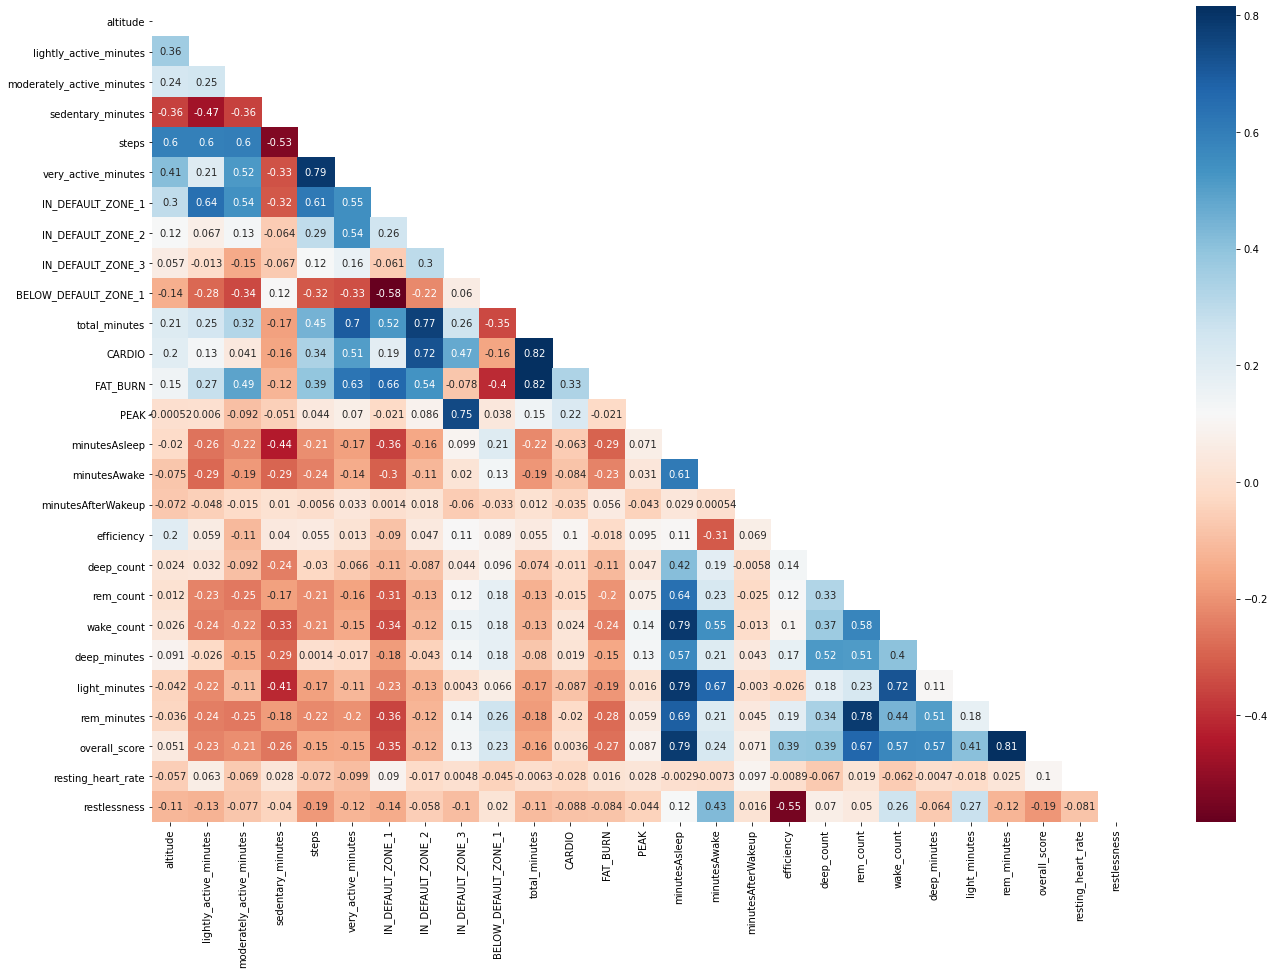

In [208]:
plt.figure(figsize=(22, 15))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='RdBu', mask=mask, annot=True);

- `timeinbed` is strongly correlated with `minutesAsleep` and it is just a sum of `minutesAsleep` and `minutesAwake`--> `timeinbed` will be removed
- `steps` and `distance` are strongly correlated (>90%) --> `distance` will be removed
- `steps` and `calories` are strongly correlated (>90%) --> `calories` will be removed
- `wake_count` and `light_count` are strongly correlated (>90%) --> `light_count` will be removed

In [54]:
fitbit_no_nan.drop(columns=['timeInBed', 'distance', 'calories', 'light_count'], inplace=True)

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### An impression on data distribution of all the features (including target feature)

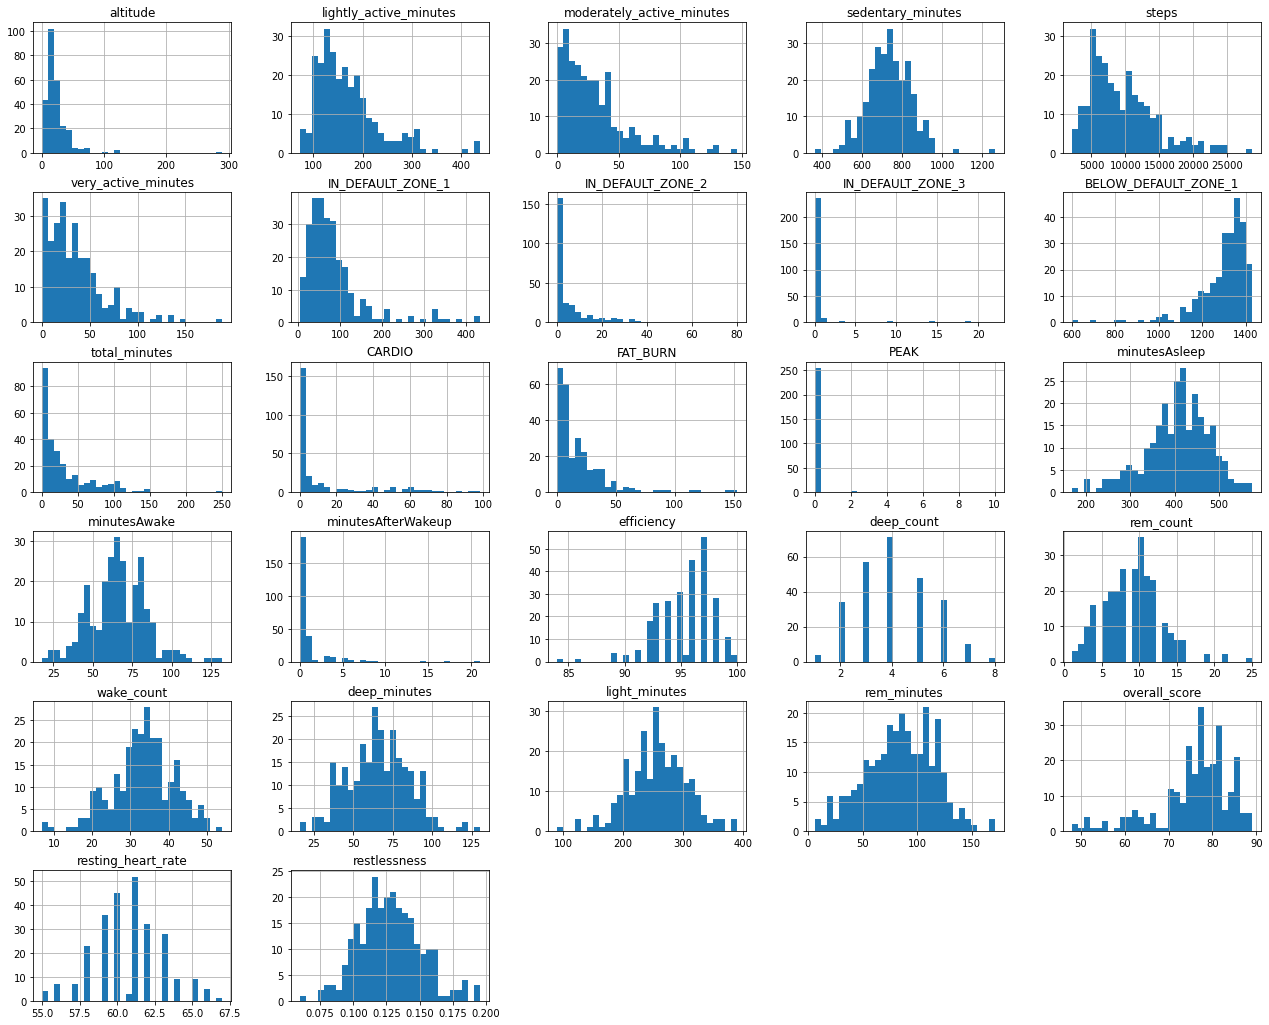

In [187]:
fitbit_no_nan.hist(bins=30, figsize=(22,18));

## Approach (1):
- Feature scaling: Standardization --> to reduce the effect of outliers
***
- For evaluation: the following metrics are used
    1. R2 score
    2. RMSE score

## Approach (2):
- Evaluation approach: the approach is chosen due to the dataset being very small (<1000 instances)
    1. For `linear regression` and `random forest regressor` model
        1. Evaluate on the train dataset
        2. Cross-validate using the train dataset
        3. Compare the RMSE scores of A and B for conclusion on model's fitting
        4. Evaluate on the test dataset
        5. Final comparison
    ***   
    2. For `Ridge` and `Lasso` models: due to the impact of having a good alpha, which is a parameter in the minimization objective of these models (more on this in the next slides)
        1. Per model (Ridge or Lasso), develop 10 sub-models based on various alpha's
        2. Use cross-validation approach on the train dataset to pick the best model (with a specific alpha)
        3. Continue with the chosen model
        4. Evaluate on the train set
        5. Evaluate on the test set

## Approach (3):
- Linear regression model: 
    1. Used both `sklearn`, as well as `statsmodel` package. The latter was used to kick out non-statistically significant coefficients to produce a `reduced linear model`.
    2. The `reduced linear model` contains the following parameters:
        - minutesAsleep
        - minutesAwake
        - efficiency
        - deep_minutes
        - light_minutes
        - rem_minutes
        - resting_heart_rates
    *** 
    3. The evaluation approach mentioned above was applied on the `reduced linear model`

In [61]:
corr = fitbit_no_nan.corr()

In [62]:
np.abs(corr['overall_score']).sort_values(ascending=False)

<IPython.core.display.Javascript object>

overall_score                1.000000
rem_minutes                  0.811201
minutesAsleep                0.786056
rem_count                    0.671317
wake_count                   0.574874
deep_minutes                 0.566017
light_minutes                0.406934
deep_count                   0.392562
efficiency                   0.388337
IN_DEFAULT_ZONE_1            0.346711
FAT_BURN                     0.268652
sedentary_minutes            0.257610
minutesAwake                 0.236094
BELOW_DEFAULT_ZONE_1         0.234753
lightly_active_minutes       0.227942
moderately_active_minutes    0.209098
restlessness                 0.194807
total_minutes                0.161008
steps                        0.154474
very_active_minutes          0.148873
IN_DEFAULT_ZONE_3            0.132167
IN_DEFAULT_ZONE_2            0.115053
resting_heart_rate           0.103735
PEAK                         0.086874
minutesAfterWakeup           0.070959
altitude                     0.050742
CARDIO      

In [63]:
cols = list(np.abs(corr['overall_score']).sort_values(ascending=False).index)[:16]
cols.remove('overall_score')

<IPython.core.display.Javascript object>

## An impression of the strong correlations with the overall sleep score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

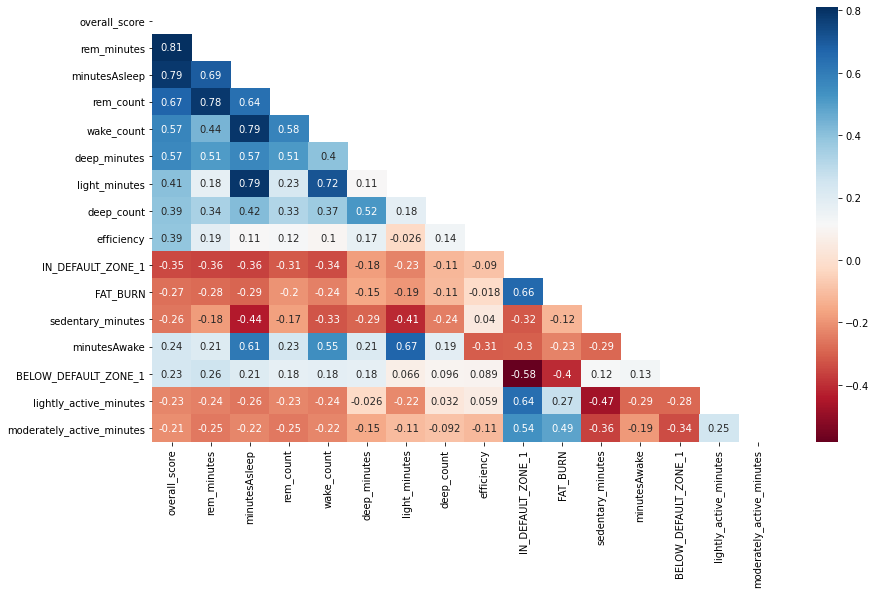

In [371]:
cols_subset = list(np.abs(corr['overall_score']).sort_values(ascending=False).index)[:16]
corr_subset = fitbit_no_nan[cols_subset].corr()
plt.figure(figsize=(14, 8))
mask = np.triu(np.ones_like(corr_subset, dtype=np.bool))
sns.heatmap(corr_subset, cmap='RdBu', mask=mask, annot=True);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

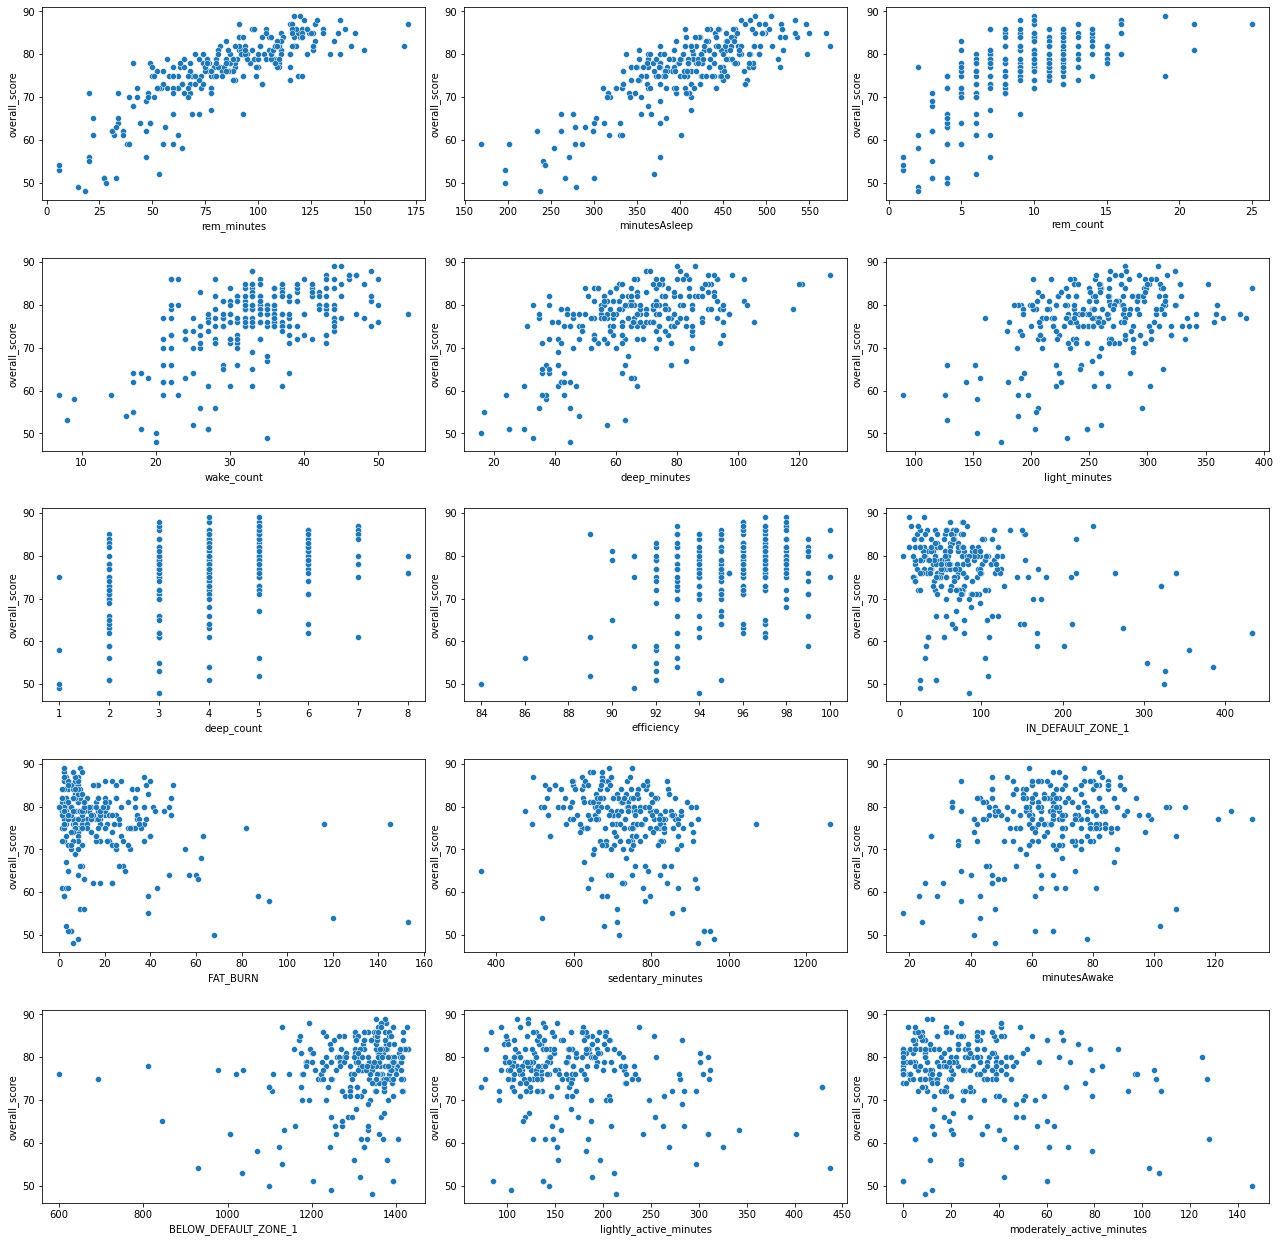

In [210]:
fig, axs = plt.subplots(5, 3, figsize=(22, 22))
for i in range(5):
    for j in range(3):
        plt.sca(axs[i, j])
        sns.scatterplot(x=cols[3*i+j], y='overall_score', data=fitbit_no_nan)
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

### Splitting the dataset

In [65]:
from sklearn.model_selection import train_test_split
X = fitbit_no_nan.drop(columns='overall_score')
y = fitbit_no_nan['overall_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Performing feature scaling

In [66]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_transformer = std_scaler.fit(X_train)
X_test_transforer = std_scaler.fit(X_test)

X_train_scaled = X_train_transformer.transform(X_train)
X_test_scaled = X_train_transformer.transform(X_test)

### Model selection and training

## Linear regression model:

In [199]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

lin_model.fit(X_train_scaled, y_train)

LinearRegression()

In [200]:
y_pred = lin_model.predict(X_train_scaled)

### Eye-balling the predictions

In [201]:
pd.DataFrame({'y_true': y_train, 'predicted': y_pred})

<IPython.core.display.Javascript object>

,y_true,predicted
212,85.00,81.30
66,66.00,71.50
16,77.00,79.20
55,51.00,58.86
250,54.00,56.14
...,...,...
20,76.00,75.06
188,80.00,79.87
71,76.00,82.70
106,78.00,76.99


### R2_score evaluation based on the training set

In [203]:
import sklearn
from sklearn.metrics import r2_score
print('The coefficient of Determination of the model is:',r2_score(y_train, y_pred))

The coefficient of Determination of the model is: 0.8464294379719111


### R2_score evaluation based on the test set

In [71]:
y_test_pred = lin_model.predict(X_test_scaled)
print('The coefficient of Determination of the model is:',r2_score(y_test, y_test_pred))

The coefficient of Determination of the model is: 0.8114647283131318


### Evaluating the model using RMSE metric

In [72]:
from sklearn.metrics import mean_squared_error, 
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

<IPython.core.display.Javascript object>

3.2736112111130455


In [73]:
print(min(y_train), max(y_train))

48.0 89.0


### OLS via statsmodel

In [74]:
from scipy import stats
import statsmodels.api as sm

In [75]:
X_train_scaled_1 = sm.add_constant(X_train_scaled)
model_OLS = sm.OLS(y_train, X_train_scaled_1)
results = model_OLS.fit()
# predictions = results.predict(X)

In [76]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     42.03
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           1.09e-61
Time:                        19:23:58   Log-Likelihood:                -541.81
No. Observations:                 208   AIC:                             1134.
Df Residuals:                     183   BIC:                             1217.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.5836      0.307    246.588      0.000      74.979      76.188
x1             0.0760      0.131      0.578      0.564      -0.183       0.335
x2            -0.9772      0.586     -1.668      0.097      -2.133       0.179
x3            -0.0960      0.555     -0.173      0.863      -1.191       0.999
x4             0.0675      0.387      0.174      0.862      -0.696       0.831
x5             0.9838      0.891      1.104      0.271      -0.775       2.743
x6            -0.7600      0.858     -0.885      0.377      -2.453       0.934
x7             0.0323      0.661      0.049      0.961      -1.272       1.337
x8            -0.3776      0.645     -0.586      0.559      -1.650       0.894
x9            -0.3147      0.326     -0.965      0.336      -0.958       0.329
x10            0.1409      0.334      0.422      0.673      -0.517       0.799
x11            0.3285      0.301      1.092      0.276      -0.265       0.922
x12            0.3446      0.350      0.985      0.326      -0.346       1.035
x13            0.2408      0.516      0.467      0.641      -0.777       1.258
x14            0.0531      0.112      0.473      0.636      -0.168       0.274
x15            2.8963      0.288     10.065      0.000       2.329       3.464
x16           -1.1246      0.404     -2.781      0.006      -1.923      -0.327
x17            0.0862      0.224      0.385      0.701      -0.356       0.528
x18            1.2751      0.309      4.127      0.000       0.666       1.885
x19           -0.0951      0.320     -0.297      0.767      -0.727       0.537
x20           -0.0542      0.507     -0.107      0.915      -1.055       0.947
x21            0.4778      0.531      0.899      0.370      -0.571       1.526
x22            1.0106      0.309      3.275      0.001       0.402       1.619
x23            1.3822      0.412      3.358      0.001       0.570       2.194
x24            4.2700      0.426     10.018      0.000       3.429       5.111
x25            1.0714      0.277      3.871      0.000       0.525       1.618
x26           -0.3385      0.261     -1.298      0.196      -0.853       0.176
==============================================================================
Omnibus:                       26.750   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.387
Skew:                          -0.842   Prob(JB):                     3.41e-08
Kurtosis:                       4.064   Cond. No.                     9.50e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.45e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [77]:
fitbit_no_nan.columns

Index(['altitude', 'lightly_active_minutes', 'moderately_active_minutes',
       'sedentary_minutes', 'steps', 'very_active_minutes',
       'IN_DEFAULT_ZONE_1', 'IN_DEFAULT_ZONE_2', 'IN_DEFAULT_ZONE_3',
       'BELOW_DEFAULT_ZONE_1', 'total_minutes', 'CARDIO', 'FAT_BURN', 'PEAK',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup', 'efficiency',
       'deep_count', 'rem_count', 'wake_count', 'deep_minutes',
       'light_minutes', 'rem_minutes', 'overall_score', 'resting_heart_rate',
       'restlessness'],
      dtype='object')

In [78]:
cols_1 = list(fitbit_no_nan.columns)
cols_1.remove('overall_score')

In [79]:
X_reduced = fitbit_no_nan.drop(columns=['altitude', 'lightly_active_minutes', 'moderately_active_minutes',
       'sedentary_minutes', 'steps', 'very_active_minutes',
       'IN_DEFAULT_ZONE_1', 'IN_DEFAULT_ZONE_2', 'IN_DEFAULT_ZONE_3',
       'BELOW_DEFAULT_ZONE_1', 'total_minutes', 'CARDIO', 'FAT_BURN', 'PEAK', 'minutesAfterWakeup',
                                       'deep_count', 'rem_count', 'wake_count', 'restlessness', 'overall_score'])
y = fitbit_no_nan['overall_score']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [212]:
X_reduced

,minutesAsleep,minutesAwake,efficiency,deep_minutes,light_minutes,rem_minutes,resting_heart_rate
0,407.60,66.26,95.37,65.71,257.25,84.64,60.73
1,408.00,76.00,95.00,69.00,240.00,99.00,55.00
2,377.00,67.00,95.00,43.00,285.00,49.00,55.00
3,424.00,79.00,94.00,67.00,288.00,69.00,58.00
4,407.60,66.26,95.37,65.71,257.25,84.64,60.73
...,...,...,...,...,...,...,...
256,234.00,25.00,96.00,43.00,144.00,47.00,59.00
257,357.00,41.00,97.00,77.00,230.00,50.00,61.00
258,481.00,69.00,98.00,71.00,282.00,128.00,61.00
259,427.00,84.00,97.00,85.00,254.00,88.00,60.00


In [80]:
X_train_transformer_1 = std_scaler.fit(X_train_1)
X_test_transforer_1 = std_scaler.fit(X_test_1)

X_train_scaled_1 = X_train_transformer_1.transform(X_train_1)
X_test_scaled_1 = X_train_transformer_1.transform(X_test_1)

In [211]:
lin_model_reduced = LinearRegression()
lin_model_reduced.fit(X_train_scaled_1, y_train_1)
y_pred_1 = lin_model_reduced.predict(X_train_scaled_1)

In [242]:
lin_reduced_r2_score_train = r2_score(y_train_1, y_pred_1)
print('The coefficient of Determination of the model is:',lin_reduced_r2_score_train)


The coefficient of Determination of the model is: 0.835900888359008


In [243]:
y_test_pred_1 = model.predict(X_test_scaled_1)

lin_reduced_r2_score_test = r2_score(y_test_1, y_test_pred_1)
print('The coefficient of Determination of the model is:',lin_reduced_r2_score_test)


The coefficient of Determination of the model is: 0.8175523808909751


In [246]:
lin_reduced_mse_train = mean_squared_error(y_train_1, y_pred_1)
lin_reduced_rmse_train = np.sqrt(lin_reduced_mse_train)

<IPython.core.display.Javascript object>

In [248]:
lin_reduced_rmse_train

3.383967843923337

In [257]:
lin_reduced_mse_test = mean_squared_error(y_test_1, y_test_pred_1)
lin_reduced_rmse_test = np.sqrt(lin_reduced_mse_test)
lin_reduced_rmse_test

<IPython.core.display.Javascript object>

3.560553883866889

### Cross-validation of the `reduced` linear regression model

In [249]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10)

# for train_indices, test_indices in k_fold.split(X_train_scaled_1):
#     print('Train: %s | test: %s' % (train_indices, test_indices))

In [253]:
scores = cross_val_score(model, X_train_scaled_1, y_train_1, scoring='neg_mean_squared_error', cv=k_fold)

lin_reduced_rmse_scores = np.sqrt(-scores)

<IPython.core.display.Javascript object>

In [251]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [453]:
display_scores(lin_reduced_rmse_scores)

Scores: [3.28713897 4.65314476 3.92649457 3.35620202 3.44794255 2.95659065
 4.04309695 3.12068969 3.05326573 2.67349608]
Mean: 3.4518061973657694
Standard deviation: 0.5633752081102302


In [254]:
lin_reduced_rmse_CV = lin_reduced_rmse_scores.mean()

In [256]:
lin_reduced_rmse_CV

3.4518061973657694

## Ridge and Lass regression: quick theoretical walk-through

- Powerful techniques, generally used for creating models in presence of a `large` number of features
- They work by `penalizing the magnitude of coefficients of features` along with `minimizing the error between predicted and actual observations` --> `Regularization`
- One key difference between ridge and lasso regression: the former tries to take all the features along in its optimization, while the latter has feature selection, i.e. producing coefficients equalling 0 (sparsity)

- Ridge regression: 
    - Minimization objective = LS Obj + `α * (sum of square of coefficients)`

- Lasso regression:
    - Minimization objective = LS Obj + `α * (sum of absolute value of coefficients)`

- α (alpha) is the parameter which balances the amount of emphasis given to minimizing `RSS` vs minimizing `sum of square of coefficients` or `sum of absolute value of coefficients`.

1. α = 0:
    - The objective becomes same as simple linear regression.
    - We’ll get the same coefficients as simple linear regression.

2. 0 < α < ∞:
    - The magnitude of α will decide the weightage given to different parts of objective.
    - The coefficients will be somewhere between 0 and ones for simple linear regression.

### An illustration of the effect of alpha on model fitting

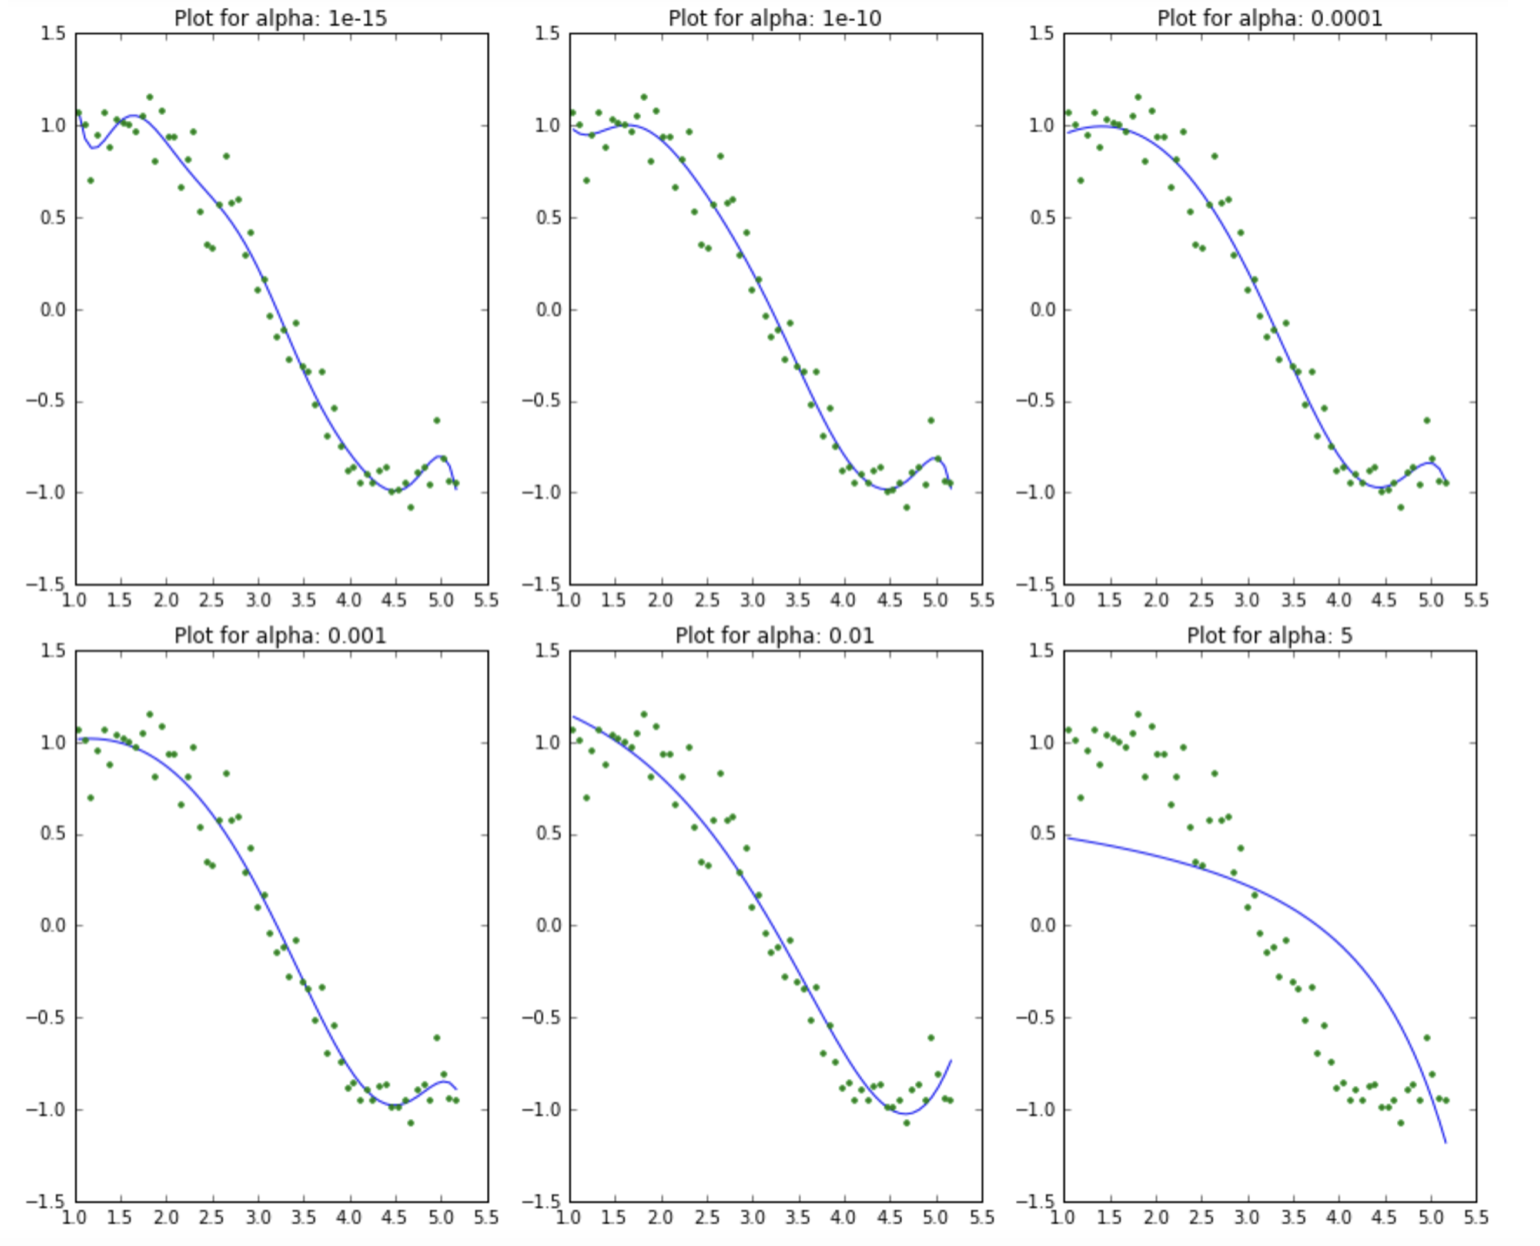

In [222]:
from IPython.display import Image
Image('Ridge_illustration1.png')

### Ridge regression

In [213]:
from sklearn.linear_model import Ridge

In [214]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

In [215]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10)

In [223]:
col = ['rmse','intercept'] + [f'coef_x_{i}' for i in range(len(list(X_train_scaled)[1]))]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

cro_val_matrix = pd.DataFrame(index=ind, columns=['rsme_mean', 'rsme_std'])

for enum, alpha in enumerate(alpha_ridge):
    ridge_model = Ridge(alpha=alpha, normalize=False)
    ridge_model.fit(X_train_scaled, y_train)

    y_pred = ridge_model.predict(X_train_scaled)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    
    param = [rmse]
    param.extend([ridge_model.intercept_])
    param.extend(list(ridge_model.coef_))
    
    coef_matrix_ridge.iloc[enum, :] = param
    
    # Cross-validating the ridge models:
    ridge_scores = cross_val_score(ridge_model, X_train_scaled, y_train,
                                   scoring='neg_mean_squared_error', cv=k_fold)
    ridge_rmse_scores = np.sqrt(-ridge_scores)
    cro_val_matrix.iloc[enum, :] = [ridge_rmse_scores.mean(), ridge_rmse_scores.std()]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.6836e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.73569e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07042e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### An impression on my selecting alpha in using ridge regression

In [229]:
pd.options.display.float_format = '{:,.4f}'.format
display(coef_matrix_ridge)

<IPython.core.display.Javascript object>

,rmse,intercept,coef_x_0,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,...,coef_x_16,coef_x_17,coef_x_18,coef_x_19,coef_x_20,coef_x_21,coef_x_22,coef_x_23,coef_x_24,coef_x_25
alpha_1e-15,3.2736,75.5836,0.0760,-0.9772,-0.0960,0.0675,0.9838,-0.7600,0.0323,-0.3776,...,0.0862,1.2751,-0.0951,-0.0542,0.4778,1.3094,2.3126,4.8061,1.0714,-0.3385
alpha_1e-10,3.2736,75.5836,0.0760,-0.9772,-0.0960,0.0675,0.9838,-0.7600,0.0323,-0.3776,...,0.0862,1.2751,-0.0951,-0.0542,0.4778,1.0109,1.3831,4.2705,1.0714,-0.3385
alpha_1e-08,3.2736,75.5836,0.0760,-0.9772,-0.0960,0.0675,0.9838,-0.7600,0.0323,-0.3776,...,0.0862,1.2751,-0.0951,-0.0542,0.4778,1.0106,1.3822,4.2700,1.0714,-0.3385
alpha_0.0001,3.2736,75.5836,0.0760,-0.9772,-0.0960,0.0675,0.9838,-0.7599,0.0323,-0.3776,...,0.0862,1.2751,-0.0951,-0.0542,0.4778,1.0106,1.3822,4.2700,1.0714,-0.3385
alpha_0.001,3.2736,75.5836,0.0760,-0.9772,-0.0959,0.0675,0.9837,-0.7598,0.0323,-0.3775,...,0.0862,1.2751,-0.0951,-0.0542,0.4778,1.0106,1.3822,4.2699,1.0714,-0.3385
alpha_0.01,3.2736,75.5837,0.0761,-0.9766,-0.0955,0.0673,0.9824,-0.7587,0.0321,-0.3773,...,0.0862,1.2750,-0.0950,-0.0536,0.4778,1.0105,1.3821,4.2694,1.0714,-0.3387
alpha_1,3.2741,75.5925,0.0805,-0.9211,-0.0538,0.0497,0.8597,-0.6523,0.0122,-0.3544,...,0.0925,1.2702,-0.0843,0.0032,0.4794,1.0032,1.3686,4.2104,1.0657,-0.3589
alpha_5,3.2821,75.6198,0.0897,-0.8026,0.0329,-0.0199,0.5679,-0.4113,-0.0405,-0.2903,...,0.1125,1.2559,-0.0473,0.1940,0.4988,0.9807,1.3075,3.9995,1.0424,-0.4259
alpha_10,3.2991,75.6435,0.0940,-0.7430,0.0700,-0.0944,0.3874,-0.2770,-0.0808,-0.2424,...,0.1303,1.2424,-0.0096,0.3730,0.5299,0.9618,1.2344,3.7830,1.0137,-0.4895
alpha_20,3.3421,75.6737,0.0969,-0.6958,0.0822,-0.2040,0.2096,-0.1646,-0.1315,-0.1895,...,0.1543,1.2200,0.0499,0.6138,0.5838,0.9388,1.1164,3.4524,0.9593,-0.5784


### Cross validation outcome

In [231]:
pd.options.display.float_format = '{:,.2f}'.format
display(cro_val_matrix)

<IPython.core.display.Javascript object>

,rsme_mean,rsme_std
alpha_1e-15,3.93,0.77
alpha_1e-10,3.93,0.77
alpha_1e-08,3.93,0.77
alpha_0.0001,3.93,0.77
alpha_0.001,3.93,0.77
alpha_0.01,3.93,0.77
alpha_1,3.92,0.77
alpha_5,3.88,0.75
alpha_10,3.86,0.74
alpha_20,3.84,0.73


## --> alpha = 20 was chosen

### Evaluate the ridge model alpha_20 with the test set

In [258]:
ridge_model_a_20 = Ridge(alpha=0.001, normalize=False)
ridge_model_a_20.fit(X_train_scaled, y_train)
y_pred_a_20_train = ridge_model_a_20.predict(X_train_scaled)
mse_a_20_train = mean_squared_error(y_train, y_pred_a_20_train)
rmse_a_20_train = np.sqrt(mse_a_20_train)

<IPython.core.display.Javascript object>

In [259]:
y_pred_a_20_test = ridge_model_a_20.predict(X_test_scaled)
mse_a_20_test = mean_squared_error(y_test, y_pred_a_20_test)
rmse_a_20_test = np.sqrt(mse_a_20_test)

<IPython.core.display.Javascript object>

In [260]:
print(rmse_a_20_train, rmse_a_20_test)

3.2736112116754916 3.6194481248090735


In [265]:
ridge_r2_train = ridge_model_a_20.score(X_train_scaled, y_train)
ridge_r2_test = ridge_model_a_20.score(X_test_scaled, y_test)
print(ridge_r2_train, ridge_r2_test)

0.8464294379191405 0.8114668219981523


### Lasso regression

In [159]:
from sklearn.linear_model import Lasso

In [160]:
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

In [235]:
col_l = ['rmse','intercept'] + [f'coef_x_{i}' for i in range(len(list(X_train_scaled)[1]))]
ind_l = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind_l, columns=col_l)

cro_val_matrix_l = pd.DataFrame(index=ind_l, columns=['rsme_mean', 'rsme_std'])

for enum, alpha in enumerate(alpha_lasso):
    lasso_model = Lasso(alpha=alpha, normalize=False, tol=0.0001)
    lasso_model.fit(X_train_scaled, y_train)

    y_pred_l = lasso_model.predict(X_train_scaled)
    mse_l = mean_squared_error(y_train, y_pred_l)
    rmse_l = np.sqrt(mse_l)
    
    param_l = [rmse_l]
    param_l.extend([lasso_model.intercept_])
    param_l.extend(list(lasso_model.coef_))
    
    coef_matrix_lasso.iloc[enum, :] = param_l
    
    # Cross-validating the ridge models:
    lasso_scores = cross_val_score(lasso_model, X_train_scaled, y_train,
                                   scoring='neg_mean_squared_error', cv=k_fold)
    lasso_rmse_scores = np.sqrt(-lasso_scores)
    cro_val_matrix_l.iloc[enum, :] = [lasso_rmse_scores.mean(), lasso_rmse_scores.std()]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273.40098722807033, tolerance: 1.451475
  model = cd_fast.enet_coordinate_descent(


<IPython.core.display.Javascript object>

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377.85402822361766, tolerance: 1.2886684491978608
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210.06226748194763, tolerance: 1.2943978609625668
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.53334405663804, tolerance: 1.3380823529411767
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-p

<IPython.core.display.Javascript object>

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229.44067858357948, tolerance: 1.451475
  model = cd_fast.enet_coordinate_descent(


<IPython.core.display.Javascript object>

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.56693198176777, tolerance: 1.2886684491978608
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.7435633527972, tolerance: 1.2943978609625668
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.00820205331092, tolerance: 1.3380823529411767
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-pa

<IPython.core.display.Javascript object>

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229.44175279104388, tolerance: 1.451475
  model = cd_fast.enet_coordinate_descent(


<IPython.core.display.Javascript object>

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.56463225503285, tolerance: 1.2886684491978608
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.74332056163985, tolerance: 1.2943978609625668
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.00790635452836, tolerance: 1.3380823529411767
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-p

<IPython.core.display.Javascript object>

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229.64126630703004, tolerance: 1.451475
  model = cd_fast.enet_coordinate_descent(


<IPython.core.display.Javascript object>

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.81359592717922, tolerance: 1.2886684491978608
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.00367826679667, tolerance: 1.2943978609625668
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.10516047415445, tolerance: 1.3380823529411767
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-p

<IPython.core.display.Javascript object>

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231.87708075495016, tolerance: 1.451475
  model = cd_fast.enet_coordinate_descent(


<IPython.core.display.Javascript object>

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209.74433086877457, tolerance: 1.2886684491978608
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.03424652106503, tolerance: 1.2943978609625668
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.17690065577676, tolerance: 1.3380823529411767
  model = cd_fast.enet_coordinate_descent(
/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-p

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### An impression on my selecting alpha in using lasso regression

In [370]:
pd.options.display.float_format = '{:,.2f}'.format
coef_matrix_lasso

<IPython.core.display.Javascript object>

,rmse,intercept,coef_x_0,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,...,coef_x_16,coef_x_17,coef_x_18,coef_x_19,coef_x_20,coef_x_21,coef_x_22,coef_x_23,coef_x_24,coef_x_25
alpha_1e-15,3.27,75.58,0.08,-0.98,-0.10,0.07,0.98,-0.76,0.03,-0.38,...,0.09,1.28,-0.10,-0.05,0.48,0.11,-1.42,2.65,1.07,-0.34
alpha_1e-10,3.27,75.58,0.08,-0.98,-0.10,0.07,0.98,-0.76,0.03,-0.38,...,0.09,1.28,-0.10,-0.05,0.48,0.11,-1.42,2.65,1.07,-0.34
alpha_1e-08,3.27,75.58,0.08,-0.98,-0.10,0.07,0.98,-0.76,0.03,-0.38,...,0.09,1.28,-0.10,-0.05,0.48,0.11,-1.42,2.65,1.07,-0.34
alpha_0.0001,3.27,75.58,0.08,-0.97,-0.09,0.07,0.98,-0.76,0.03,-0.38,...,0.09,1.27,-0.09,-0.05,0.48,0.15,-1.31,2.72,1.07,-0.34
alpha_0.001,3.27,75.59,0.08,-0.95,-0.07,0.07,0.94,-0.72,0.02,-0.36,...,0.09,1.27,-0.09,-0.04,0.47,0.49,-0.23,3.33,1.07,-0.34
alpha_0.01,3.28,75.61,0.09,-0.81,0.00,0.04,0.64,-0.44,-0.00,-0.27,...,0.08,1.28,-0.06,-0.00,0.43,0.54,0.00,3.45,1.06,-0.35
alpha_1,3.83,75.74,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,0.00,1.32,0.00,0.00,0.00,0.20,0.00,3.66,0.00,-0.04
alpha_5,7.20,76.12,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.57,0.00,-0.00
alpha_10,8.35,76.12,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
alpha_20,8.35,76.12,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00


In [241]:
coef_matrix_lasso.loc['alpha_1', :]

rmse         3.83
intercept   75.74
coef_x_0     0.00
coef_x_1    -0.00
coef_x_2    -0.00
coef_x_3    -0.00
coef_x_4     0.00
coef_x_5     0.00
coef_x_6    -0.00
coef_x_7    -0.00
coef_x_8     0.00
coef_x_9     0.00
coef_x_10    0.00
coef_x_11    0.00
coef_x_12   -0.00
coef_x_13    0.00
coef_x_14    3.12
coef_x_15   -0.00
coef_x_16    0.00
coef_x_17    1.32
coef_x_18    0.00
coef_x_19    0.00
coef_x_20    0.00
coef_x_21    0.20
coef_x_22    0.00
coef_x_23    3.66
coef_x_24    0.00
coef_x_25   -0.04
Name: alpha_1, dtype: object

### Cross validation outcome

In [239]:
display(cro_val_matrix_l)

,rsme_mean,rsme_std
alpha_1e-15,3.93,0.77
alpha_1e-10,3.93,0.77
alpha_1e-08,3.93,0.77
alpha_0.0001,3.93,0.77
alpha_0.001,3.93,0.77
alpha_0.01,3.90,0.76
alpha_1,3.88,0.76
alpha_5,7.06,1.88
alpha_10,8.19,1.84
alpha_20,8.19,1.84


## --> alpha = 1 was chosen

### Feature selection outcome of model having alpha = 1:

- minutesAsleep
- efficiency
- deep_minutes
- rem_minutes
- <font color=deeppink>restlessness</font> --> this is the feature not included in the `reduced linear model`

### Evaluate the lasso model alpha_0.01 with the test set

In [263]:
lasso_model_a_001 = Ridge(alpha=0.01, normalize=False)
lasso_model_a_001.fit(X_train_scaled, y_train)
y_pred_a_001_train = lasso_model_a_001.predict(X_train_scaled)
mse_a_001_train = mean_squared_error(y_train, y_pred_a_001_train)
rmse_a_001_train = np.sqrt(mse_a_001_train)

<IPython.core.display.Javascript object>

In [262]:
y_pred_a_001_test = lasso_model_a_001.predict(X_test_scaled)
mse_a_001_test = mean_squared_error(y_test, y_pred_a_001_test)
rmse_a_001_test = np.sqrt(mse_a_001_test)
print(rmse_a_001_train, rmse_a_001_test)

<IPython.core.display.Javascript object>

3.273611267280465 3.6192674994415936


In [261]:
lasso_r2_train = lasso_model_a_001.score(X_train_scaled, y_train)
lasso_r2_test = lasso_model_a_001.score(X_test_scaled, y_test)
print(lasso_r2_train, lasso_r2_test)

0.8464294327020963 0.8114856386926705


### Random forest regressor

In [268]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train)
y_pred_forest_train = forest_reg.predict(X_train_scaled)
forest_mse_train = mean_squared_error(y_train, y_pred_forest_train)
forest_rmse_train = np.sqrt(forest_mse_train)
forest_rmse_train

<IPython.core.display.Javascript object>

1.4263333842678303

In [168]:
regr_scores = cross_val_score(forest_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=k_fold)
regr_rmse_scores = np.sqrt(-regr_scores)
display_scores(regr_rmse_scores)

<IPython.core.display.Javascript object>

Scores: [3.90013187 4.17829824 4.21470103 3.54085072 4.17810164 3.09218831
 5.81126984 2.99950155 3.20390387 2.53424249]
Mean: 3.7653189554705406
Standard deviation: 0.8756528159324484


In [267]:
regr_rmse_score_CV = regr_rmse_scores.mean()
regr_rmse_score_CV

3.7653189554705406

In [270]:
y_pred_forest_test = forest_reg.predict(X_test_scaled)
forest_mse_test = mean_squared_error(y_test, y_pred_forest_test)
forest_rmse_test = np.sqrt(forest_mse_test)
forest_rmse_test

<IPython.core.display.Javascript object>

2.735485883507339

In [272]:
forest_r2_train = forest_reg.score(X_train_scaled, y_train)
forest_r2_test = forest_reg.score(X_test_scaled, y_test)
print(forest_r2_train, forest_r2_test)

0.9708461530512066 0.8923108296701607


In [325]:
matrix_rows = ['Reduced linear regression', 'Ridge regression α=20',
               'Lasso regression α=1', 'Random Forest Regressor']
matrix_metrics = pd.DataFrame({'R2_train': [lin_reduced_r2_score_train, ridge_r2_train, lasso_r2_train, forest_r2_train],
                               'R2_test': [lin_reduced_r2_score_test, ridge_r2_test, lasso_r2_test, forest_r2_test],
                               'RMSE_train': [lin_reduced_rmse_train, rmse_a_20_train, rmse_a_001_train, forest_rmse_train],
                               'RMSE_CV': [lin_reduced_rmse_CV, np.nan, np.nan, regr_rmse_score_CV],
                               'RMSE_test': [lin_reduced_rmse_test, rmse_a_20_test, rmse_a_001_test, forest_rmse_test]}, index=matrix_rows)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [359]:
def display_func():
    sns.histplot(data=fitbit_no_nan, x='overall_score', bins=30)
    plt.xlabel('Overall sleep score', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()
    print('The min overall sleep score is:', np.round(fitbit_no_nan['overall_score'].min(), 0))
    print('The max overall sleep score is:', np.round(fitbit_no_nan['overall_score'].max(), 0))
    return None

## Metrics of all models combined

In [348]:
pd.options.display.float_format = '{:,.2f}'.format
display(matrix_metrics)

<IPython.core.display.Javascript object>

,R2_train,R2_test,RMSE_train,RMSE_CV,RMSE_test
Reduced linear regression,0.84,0.82,3.38,3.45,3.56
Ridge regression α=20,0.85,0.81,3.27,NaN,3.62
Lasso regression α=1,0.85,0.81,3.27,NaN,3.62
Random Forest Regressor,0.97,0.89,1.43,3.77,2.74


<IPython.core.display.Javascript object>

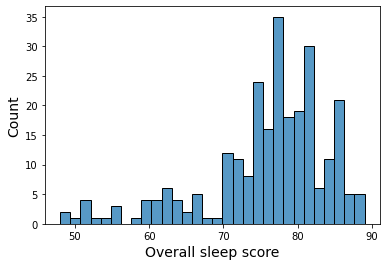

<IPython.core.display.Javascript object>

The min overall sleep score is: 48.0


<IPython.core.display.Javascript object>

The max overall sleep score is: 89.0


In [360]:
display_func()